In [1]:
import os
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib_venn import venn2
from pandas_profiling import ProfileReport

# 好みのスタイル
sns.set_style('whitegrid')

/home/jupyter/workspace/mytabular/.venv/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
datadir = Path('../data/atmacup5')
train_df = pd.read_csv(datadir / 'train.csv')
test_df = pd.read_csv(datadir / 'test.csv')
fitting_df = pd.read_csv(datadir / 'fitting.csv')

train_df = pd.merge(train_df, fitting_df, on='spectrum_id', how='left')
test_df = pd.merge(test_df, fitting_df, on='spectrum_id', how='left')

In [38]:
train_df

,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,target,params0,params1,params2,params3,params4,params5,params6,rms,beta
0,000da4633378740f1ee8,b2e223339f4abce9b400.dat,79ad4647da6de6425abf,850,2,36,140,1313.0810,0,30.808589,5.811802e+02,1037.714752,1.531423,2.246965e+04,1032.317268,8.295610e+00,10.028668,2.521298e-02
1,000ed1a5a9fe0ad2b7dd,e2f150a503244145e7ce.dat,79ad4647da6de6425abf,780,3,0,168,159.4150,0,91.300897,1.740582e+04,1080.510452,4.766233,3.325712e+04,1077.468855,8.018225e+00,7.948485,3.435612e-01
2,0016e3322c4ce0700f9a,3d58b7ccaee157979cf0.dat,c695a1e61e002b34e556,780,1,34,29,-610.7688,0,106.642946,1.000000e-10,1119.464438,2.000000,4.257987e+04,1378.883338,1.168742e+01,10.739859,2.348528e-15
3,00256bd0f8c6cf5f59c8,ed3641184d3b7c0ae703.dat,c695a1e61e002b34e556,780,2,32,139,1214.6180,0,306.933674,1.099486e+04,1139.855067,5.198692,3.934974e+04,1145.212849,9.445029e+00,10.379948,2.183921e-01
4,003483ee5ae313d37590,4c63418d39f86dfab9bb.dat,c695a1e61e002b34e556,780,0,45,85,-257.6161,0,46.133256,2.227622e+04,1120.918337,5.668012,3.105493e+04,1117.107782,7.658710e+00,8.316550,4.176962e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431,ffcc2d0e80130bcd1f66,677582af16aeb72c01df.dat,0b9dbf13f938efd5717f,850,0,8,56,-1441.3620,0,117.965648,6.532486e+03,1308.737467,4.619957,1.998167e+04,1304.604584,9.733122e+00,7.705745,2.463773e-01
7432,ffd86d57b9d44f10c7d0,6f23369fb8e0d1fde118.dat,84b788fdc5e779f8a0df,850,3,12,2,543.2881,0,191.533462,8.261092e+01,1432.459878,0.520137,5.045881e+04,1364.248997,1.547290e+01,15.661228,1.634519e-03
7433,ffdc78c1ca0a8c5a689f,825df3fcf8ce0570f0be.dat,6718e7f83c824b1e436d,780,0,41,102,-383.0251,0,-22.045684,9.999999e-11,1295.314000,2.000000,9.075595e+04,1295.527596,1.310885e+01,9.382719,1.101856e-15
7434,ffe1a53afdbab5ebddeb,5a2bd19c41cb6da70b33.dat,84b788fdc5e779f8a0df,850,3,3,124,259.5428,0,-13.162242,4.971294e+04,1435.929234,13.351986,5.000000e-13,1000.000003,3.146673e+06,6.912739,1.000000e+00


In [39]:
test_df

,spectrum_id,spectrum_filename,chip_id,exc_wl,layout_a,layout_x,layout_y,pos_x,params0,params1,params2,params3,params4,params5,params6,rms,beta
0,000c50e603636dee33c7,fe0fb0a5d966d574c98b.dat,a948b8cdcd7957eb5c31,780,3,0,184,189.6556,-0.200403,26861.147936,1377.632654,12.273408,4.999833e-13,1000.000005,44730.274402,7.981621,1.000000
1,000cba4c60cc418502e8,f1a2e526d2fbeadf20ca.dat,3c2948d0a755e5ff99f6,780,1,45,188,-256.4733,308.514851,26886.386343,1277.465325,9.919383,5.096237e-13,1001.383038,26753.813871,26.110692,1.000000
2,0016566cc4324433f909,a9c9daa6e724bda94190.dat,3c2948d0a755e5ff99f6,850,1,44,135,-291.3372,48.078481,18270.435476,1497.343413,10.583315,1.037360e+04,1490.660842,11.663950,9.727451,0.637844
3,001d350c22eb0a7bb876,02559998e0cd35810729.dat,3c2948d0a755e5ff99f6,850,1,26,141,-863.9271,179.052601,7646.843080,1498.851981,5.851480,1.899570e+04,1491.204735,13.616758,10.317538,0.287016
4,002b39505ff347dca818,fe70889bcb853adf1d05.dat,3c2948d0a755e5ff99f6,780,3,18,64,737.2772,-7414.835134,77855.568427,1172.532492,10.794408,2.827082e+07,1179.643483,2400.602334,9.761143,0.002746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,ffe3f18bccea9eca0c4b,a9309e1b871e8089dedb.dat,3c2948d0a755e5ff99f6,850,3,2,114,220.9971,150.351050,1575.743737,1087.530221,0.500000,1.198183e+04,1085.864281,5.739515,9.893204,0.116226
6948,ffe5dc9b0008f1686fbb,01d6b771f9b18d2c8be5.dat,a005efe42b620a737e7e,780,3,16,181,702.8404,285.044749,5157.487766,1153.698321,4.533969,1.655832e+04,1149.558122,6.347408,19.912753,0.237499
6949,ffe99ef3b8a4ffb5cbfd,6dc212d4616d7e28ac68.dat,3c2948d0a755e5ff99f6,780,1,25,39,-897.3608,201.594580,1298.787359,1137.037932,4.397521,4.830745e+04,1162.600089,10.304924,8.347038,0.026182
6950,fff6557194ea0487af92,73db945d1ec8d0d97b51.dat,a005efe42b620a737e7e,780,0,3,95,-1599.4280,986.415682,1536.973685,1155.252414,2.437632,1.478039e+04,1154.479281,17.361207,9.972497,0.094193


In [5]:
report = ProfileReport(pd.concat([train_df, test_df], axis=0, ignore_index=True, sort=True))

In [6]:
report.to_file('./report.html')

In [7]:
def plot_venn(train_df, test_df, column, ax):
    venn2(subsets=(set(train_df[column]), set(test_df[column])), set_labels=('train', 'test'), ax=ax)
    ax.set_title(column)
    return ax

In [8]:
def flatten(axes):
    return [x for a in axes for x in a]

In [9]:
columns = [
    'spectrum_id', 'spectrum_filename', 'chip_id', 'layout_a'
]

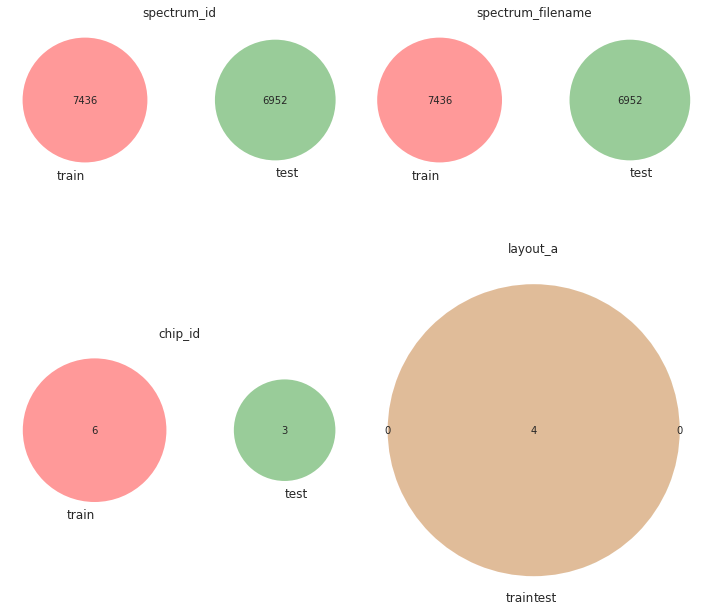

In [10]:
fig, axes = plt.subplots(figsize=(10, 10), ncols=2, nrows=2)

# ncols, nrows を指定すると二次元配列になるので flatten する
for ax, col in zip(flatten(axes), columns):
    plot_venn(train_df, test_df, column=col, ax=ax)
fig.tight_layout()

In [11]:
whole_df = pd.concat([train_df, test_df], axis=0, ignore_index=True, sort=True)
whole_df['is_train'] = [True] * len(train_df) + [False] * len(test_df)

/home/jupyter/workspace/mytabular/.venv/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/jupyter/workspace/mytabular/.venv/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jupyter/workspace/mytabular/.venv/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


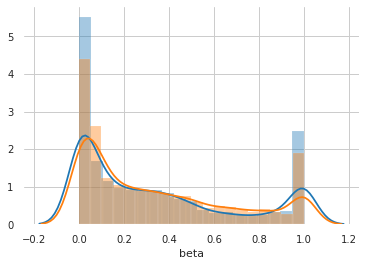

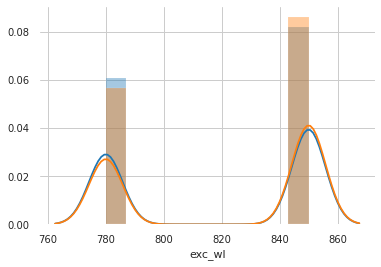

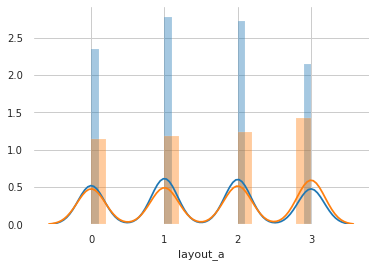

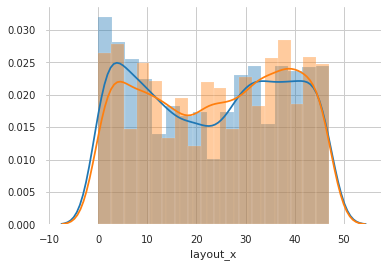

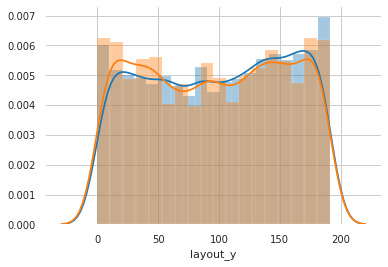

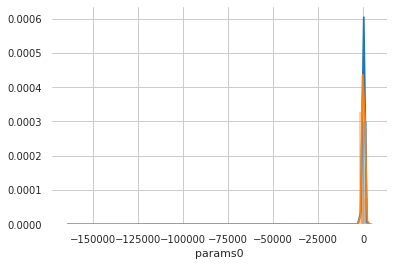

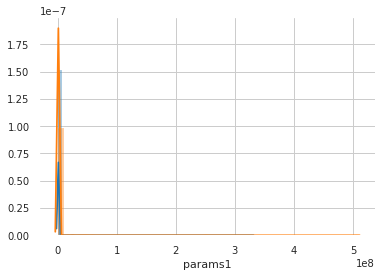

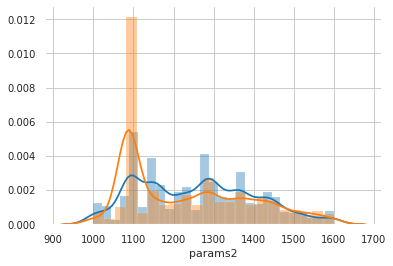

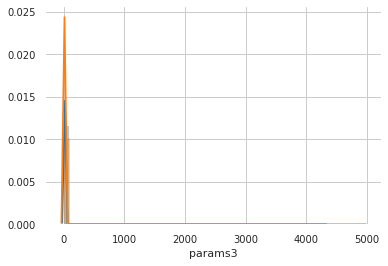

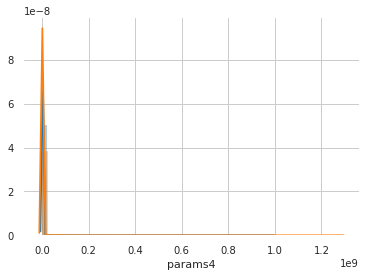

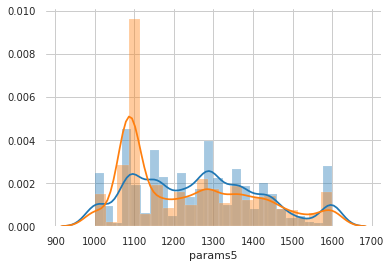

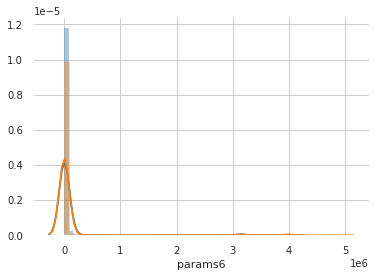

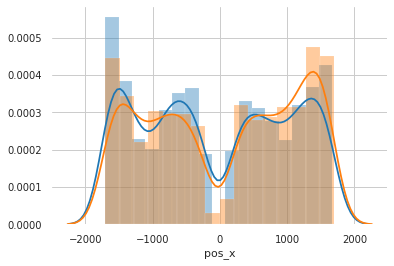

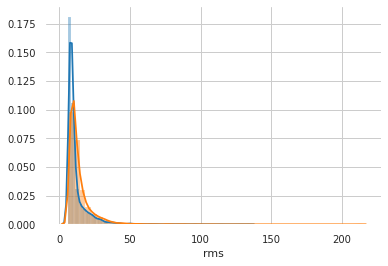

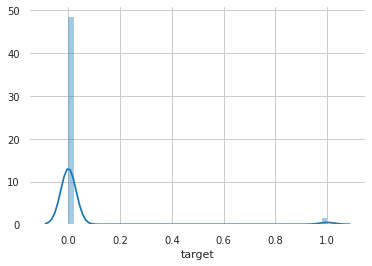

In [12]:
idx_train = whole_df['is_train'].values

for name, value in whole_df.select_dtypes(['int', 'float']).T.iterrows():
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.distplot(value[idx_train], ax=ax)
    sns.distplot(value[~idx_train], ax=ax)

/home/jupyter/workspace/mytabular/.venv/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


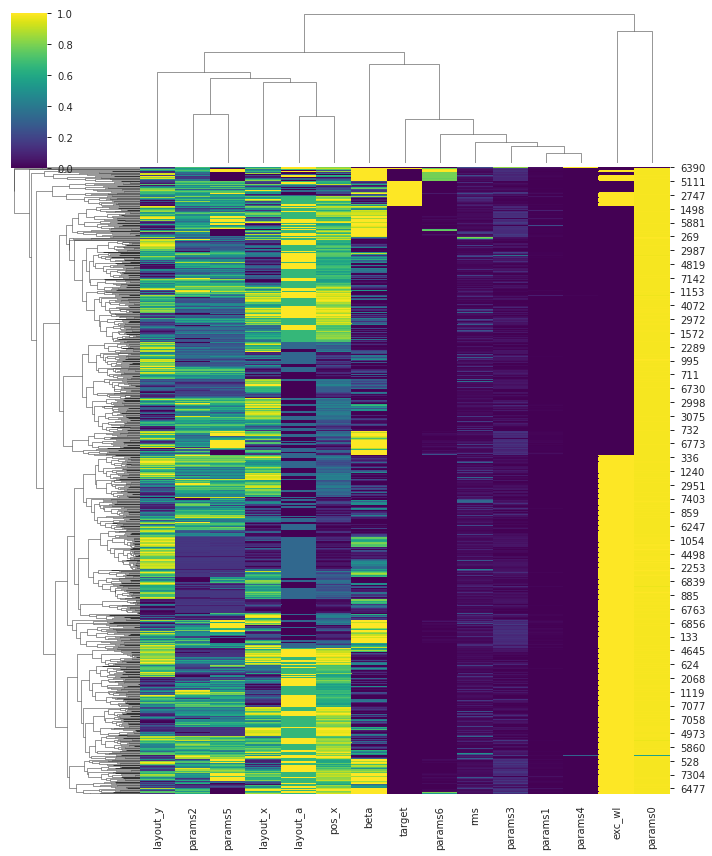

In [13]:
_df = train_df.select_dtypes(['float', 'int'])

# 全部出すと大変なので一部だけサンプリング
sns.clustermap(_df.sample(1000), standard_scale=1, cmap='viridis', figsize=(10, 12), 
               row_cluster='cosine')

In [15]:
def read_spectrum(name):
    path = datadir / 'spectrum_raw' / name

    if not os.path.exists(path):
        raise ValueError(f'{name} is not found at spectrum raw dir {path}')

    return pd.read_csv(path, header=None, sep='\t')

In [40]:
whole_df

,beta,chip_id,exc_wl,layout_a,layout_x,layout_y,params0,params1,params2,params3,params4,params5,params6,pos_x,rms,spectrum_filename,spectrum_id,target,is_train
0,2.521298e-02,79ad4647da6de6425abf,850,2,36,140,30.808589,5.811802e+02,1037.714752,1.531423,22469.651641,1032.317268,8.295610,1313.0810,10.028668,b2e223339f4abce9b400.dat,000da4633378740f1ee8,0.0,True
1,3.435612e-01,79ad4647da6de6425abf,780,3,0,168,91.300897,1.740582e+04,1080.510452,4.766233,33257.123175,1077.468855,8.018225,159.4150,7.948485,e2f150a503244145e7ce.dat,000ed1a5a9fe0ad2b7dd,0.0,True
2,2.348528e-15,c695a1e61e002b34e556,780,1,34,29,106.642946,1.000000e-10,1119.464438,2.000000,42579.867913,1378.883338,11.687417,-610.7688,10.739859,3d58b7ccaee157979cf0.dat,0016e3322c4ce0700f9a,0.0,True
3,2.183921e-01,c695a1e61e002b34e556,780,2,32,139,306.933674,1.099486e+04,1139.855067,5.198692,39349.741703,1145.212849,9.445029,1214.6180,10.379948,ed3641184d3b7c0ae703.dat,00256bd0f8c6cf5f59c8,0.0,True
4,4.176962e-01,c695a1e61e002b34e556,780,0,45,85,46.133256,2.227622e+04,1120.918337,5.668012,31054.928673,1117.107782,7.658710,-257.6161,8.316550,4c63418d39f86dfab9bb.dat,003483ee5ae313d37590,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14383,1.162261e-01,3c2948d0a755e5ff99f6,850,3,2,114,150.351050,1.575744e+03,1087.530221,0.500000,11981.831643,1085.864281,5.739515,220.9971,9.893204,a9309e1b871e8089dedb.dat,ffe3f18bccea9eca0c4b,NaN,False
14384,2.374992e-01,a005efe42b620a737e7e,780,3,16,181,285.044749,5.157488e+03,1153.698321,4.533969,16558.324763,1149.558122,6.347408,702.8404,19.912753,01d6b771f9b18d2c8be5.dat,ffe5dc9b0008f1686fbb,NaN,False
14385,2.618194e-02,3c2948d0a755e5ff99f6,780,1,25,39,201.594580,1.298787e+03,1137.037932,4.397521,48307.445699,1162.600089,10.304924,-897.3608,8.347038,6dc212d4616d7e28ac68.dat,ffe99ef3b8a4ffb5cbfd,NaN,False
14386,9.419252e-02,a005efe42b620a737e7e,780,0,3,95,986.415682,1.536974e+03,1155.252414,2.437632,14780.391432,1154.479281,17.361207,-1599.4280,9.972497,73db945d1ec8d0d97b51.dat,fff6557194ea0487af92,NaN,False


In [41]:
data = whole_df['spectrum_filename'].map(read_spectrum)

In [43]:
data.shape

(14388,)

In [18]:
output_dir = './spectrum_figs'
os.makedirs(output_dir, exist_ok=True)

In [19]:
def plot_multiple_images(start: int, length: int):
    fig, axes = plt.subplots(figsize=(20, 20), ncols=8, nrows=length // 8)
    for i, ax in zip(range(start, length), flatten(axes)):
        # 若干 safety にとってくる
        x = data.get(i, None)
        if x is None:
            raise ValueError(f'index={i} is not found at wave data')

        ax.plot(x.values[:, 1])
    return fig, ax

(<Figure size 1440x1440 with 64 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f60cc1c2a90>)

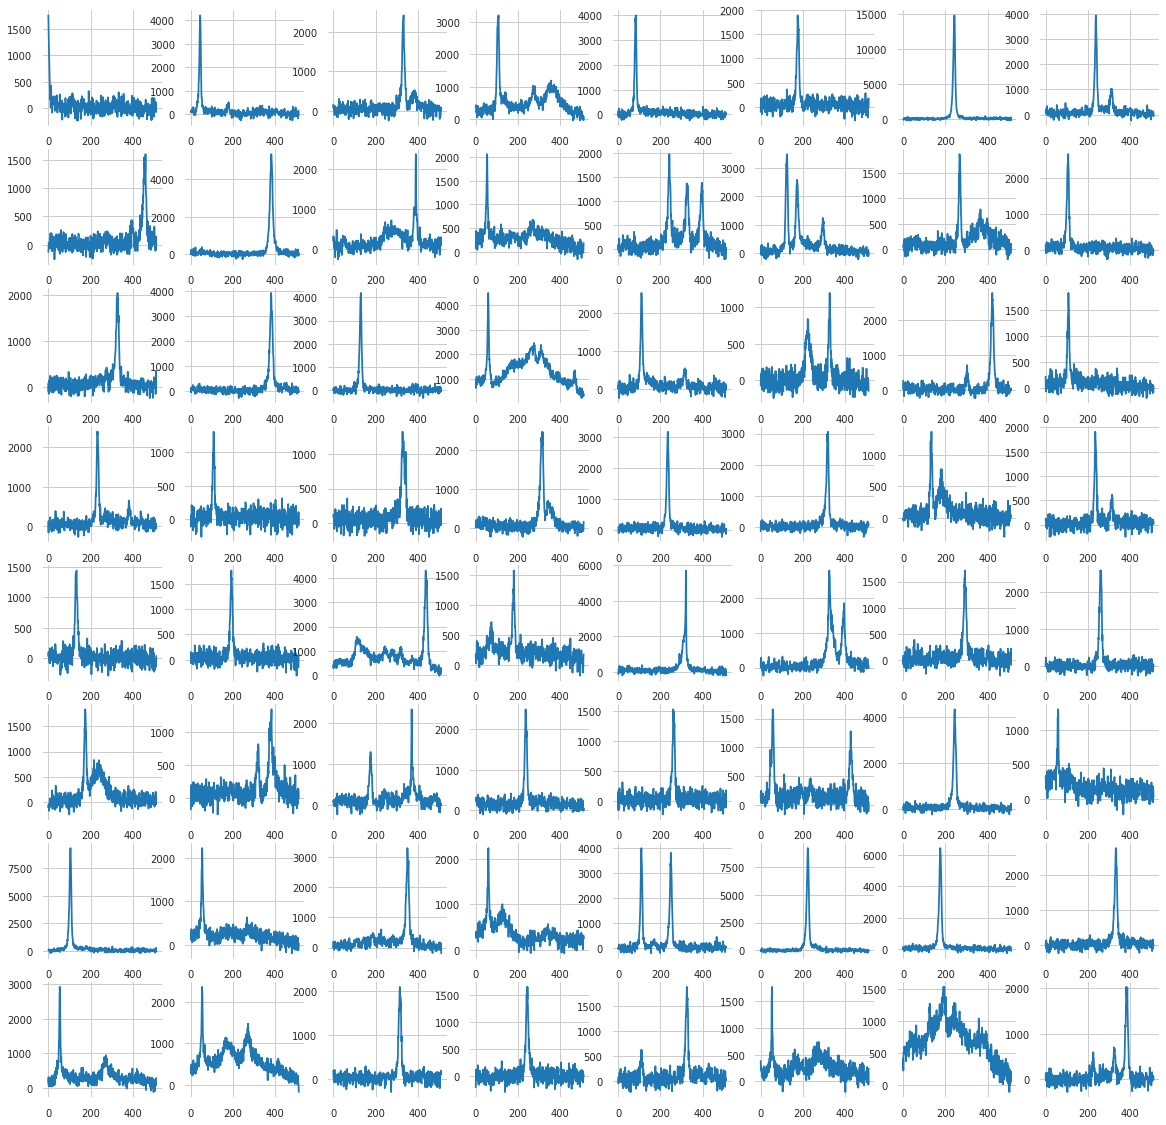

In [20]:
plot_multiple_images(0, 64)

In [45]:
wave_df = pd.DataFrame()

for k, v in data.items():
    z = np.zeros(shape=(512,), dtype=np.float)
    x_i = v.values[:, 1]
    z[:len(x_i)] = x_i
    wave_df[k] = z

In [46]:
# 学習データと同じ 512 次元の数値特徴量とみなせる。
wave_df.shape

(512, 14388)

In [47]:
from sklearn.manifold import TSNE

In [48]:
clf = TSNE(n_components=2)

In [49]:
X = wave_df.values.T
X.shape

(14388, 512)

In [50]:
z = clf.fit_transform(X)

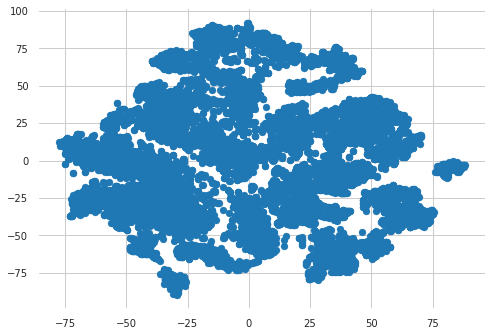

In [51]:
plt.scatter(*z.T)

In [53]:
z.shape

(14388, 2)

In [52]:
z_df = pd.DataFrame(z, columns=['project_0', 'project_1'])
z_df.to_csv(datadir / 'project_tsne.csv', index=False)

In [54]:
z_df

,project_0,project_1
0,-28.813873,-78.000725
1,-44.956909,-58.810326
2,-17.195650,41.561447
3,24.946894,-64.479172
4,82.129227,-6.013218
...,...,...
14383,-29.584602,-11.079376
14384,2.872971,-30.523861
14385,58.622559,-44.243370
14386,3.331072,-54.372078


In [29]:
projected_df = pd.DataFrame(z, columns=['project_0', 'project_1'])
projected_df = pd.concat([projected_df, train_df], axis=1)

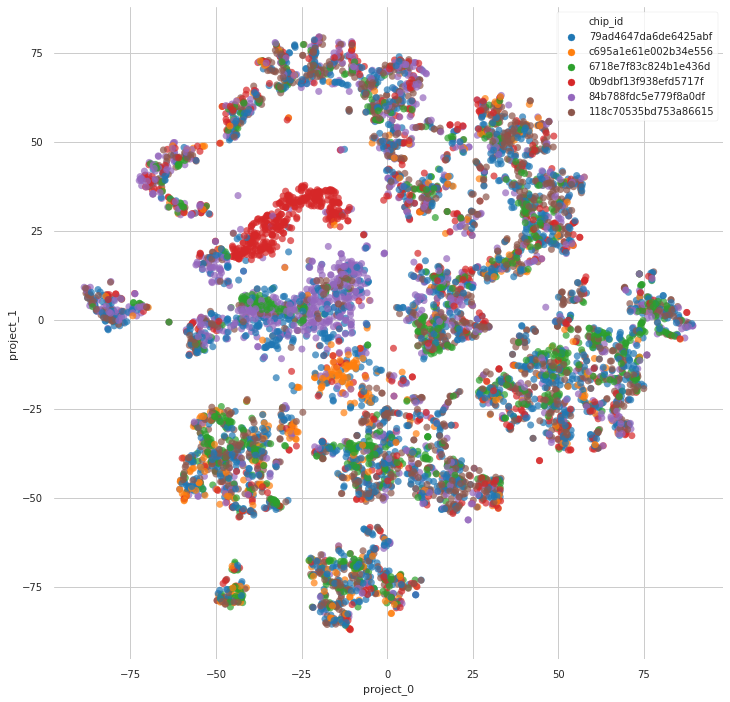

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, 
                x='project_0', y='project_1', 
                hue='chip_id', ax=ax, edgecolors='none', linewidth=0, alpha=.7)

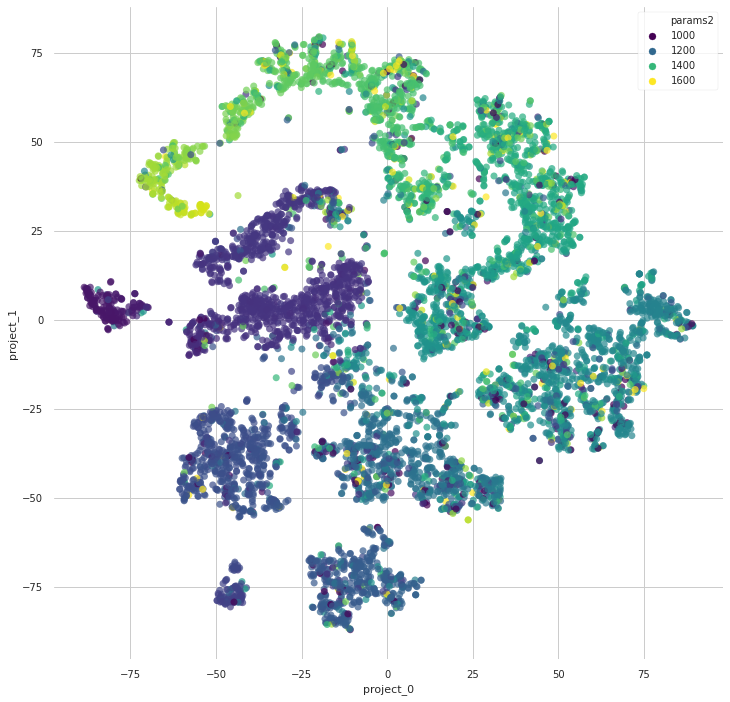

In [31]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, x='project_0', y='project_1', hue='params2', ax=ax, edgecolors='none', linewidth=0, alpha=.7, palette='viridis')

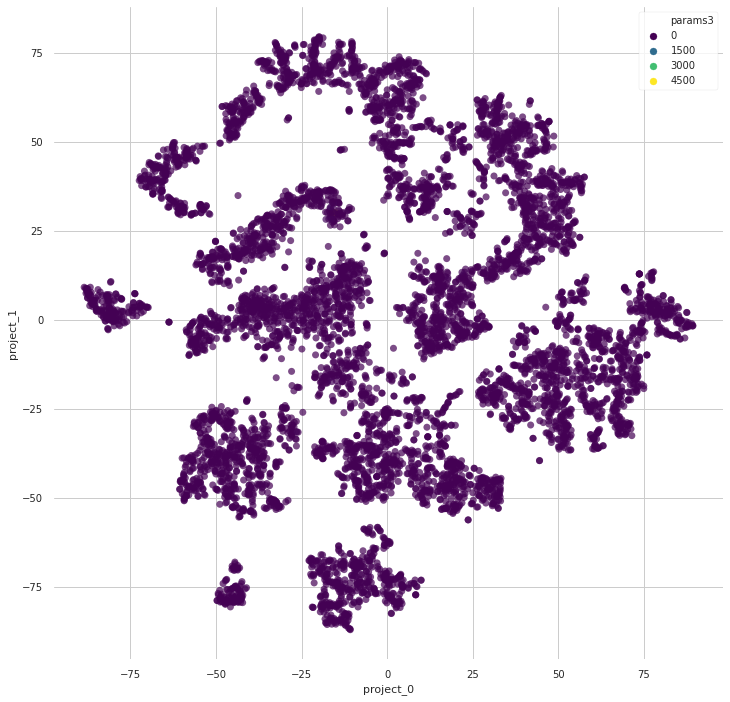

In [32]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, x='project_0', y='project_1', hue='params3', ax=ax, edgecolors='none', linewidth=0, alpha=.7, palette='viridis')

In [33]:
pd.qcut(projected_df['params3'], q=10)

0             (1.134, 2.0]
1           (4.718, 5.346]
2             (1.134, 2.0]
3           (4.718, 5.346]
4           (5.346, 5.807]
               ...        
7431        (3.604, 4.718]
7432        (0.499, 0.555]
7433          (1.134, 2.0]
7434    (12.769, 4303.512]
7435          (1.134, 2.0]
Name: params3, Length: 7436, dtype: category
Categories (10, interval[float64]): [(0.499, 0.555] < (0.555, 1.134] < (1.134, 2.0] < (2.0, 3.604] ... (5.346, 5.807] < (5.807, 10.423] < (10.423, 12.769] < (12.769, 4303.512]]

In [34]:
pd.qcut(projected_df['params3'], q=10).cat.codes

0       2
1       5
2       2
3       5
4       6
       ..
7431    4
7432    0
7433    2
7434    9
7435    2
Length: 7436, dtype: int8

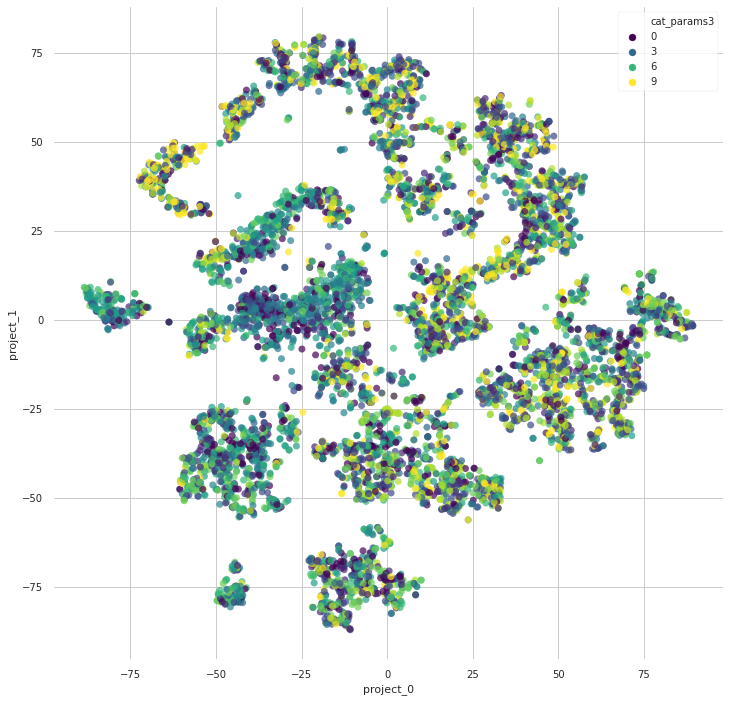

In [35]:
projected_df['cat_params3'] = pd.qcut(projected_df['params3'], q=10).cat.codes
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(data=projected_df, x='project_0', y='project_1', hue='cat_params3', ax=ax, edgecolors='none', linewidth=0, alpha=.7, palette='viridis')